In [1]:
import pandas as pd
from load_data import load_data
from convolutional_NN import train_classifier
from functional_square_loss import functional_square_loss
from plotnine import ggplot, geom_line, aes, labs
from functional_square_hinge_loss import functional_square_hinge_loss
from naive_square_loss import naive_square_loss
from naive_square_hinge_loss import naive_square_hinge_loss
import time
import numpy as np
import matplotlib.pyplot as plt

2021-09-28 11:45:43.664859: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-28 11:45:43.664877: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
SEED = 123
imratio = 0.5
lr = .5e-06
num_epochs = 10
batch_size = 500
use_subset = False
algo_list = [functional_square_loss, functional_square_hinge_loss]
str_algo_list = ['functional_square_loss', 'functional_square_hinge_loss']
train_auc_df = pd.DataFrame()

In [7]:
trainloader, testloader = load_data(SEED, use_subset, batch_size, imratio)
for x in range(2):
    train_auc_list = train_classifier(trainloader, testloader, algo_list[x], num_epochs, lr)
    train_auc_df[str_algo_list[x]] = train_auc_list
train_auc_df

NUM_SAMPLES: [50000], POS:NEG: [25000 : 25000], POS_RATIO: 0.5000
NUM_SAMPLES: [10000], POS:NEG: [5000 : 5000], POS_RATIO: 0.5000
<function functional_square_loss at 0x7f5562335e50>
Epoch: 0
{'loss': 49377.20703125, 'train_auc': 0.6516188448, 'test_auc': 0.6409725199999999, 'epoch': 0, 'lr': 5e-07}
Epoch: 1
{'loss': 49321.87109375, 'train_auc': 0.7068367088, 'test_auc': 0.69263214, 'epoch': 1, 'lr': 5e-07}
Epoch: 2
{'loss': 46250.4765625, 'train_auc': 0.7356802608, 'test_auc': 0.6843941, 'epoch': 2, 'lr': 5e-07}
Epoch: 3
{'loss': 39181.57421875, 'train_auc': 0.7541657576, 'test_auc': 0.69579256, 'epoch': 3, 'lr': 5e-07}
Epoch: 4
{'loss': 40538.421875, 'train_auc': 0.7713274583999999, 'test_auc': 0.7559122400000001, 'epoch': 4, 'lr': 5e-07}
Epoch: 5
{'loss': 35756.203125, 'train_auc': 0.7840226751999999, 'test_auc': 0.74444734, 'epoch': 5, 'lr': 5e-07}
Epoch: 6
{'loss': 33539.19921875, 'train_auc': 0.7997779552, 'test_auc': 0.7549405000000001, 'epoch': 6, 'lr': 5e-07}
Epoch: 7
{'loss': 

,functional_square_loss,functional_square_hinge_loss
0,0.651619,0.653082
1,0.706837,0.706317
2,0.735680,0.736666
3,0.754166,0.756534
4,0.771327,0.776611
5,0.784023,0.789780
6,0.799778,0.800487
7,0.809434,0.811280
8,0.816993,0.822358
9,0.825524,0.825789


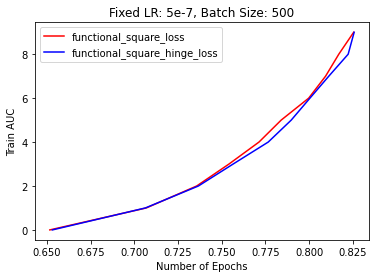

In [11]:
idx = np.array(train_auc_df.index)
plt.plot(train_auc_df['functional_square_loss'],idx,'r',
         train_auc_df['functional_square_hinge_loss'],idx,'b')
plt.legend(train_auc_df.columns)
plt.ylabel("Train AUC")
plt.xlabel("Number of Epochs")
plt.title("Fixed LR: 5e-7, Batch Size: 500")
plt.show()